In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('flight_ticket_price.csv')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


Preprocessing

In [3]:
# Drop the columns that are not needed
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.drop(['flight'], axis=1, inplace=True)

In [4]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [5]:
# convert the categorical data to numerical data useing one hot encoding  or Binary Encoding
# One hot encoding is used for nominal data for example the airline column te value count is 4

# candidate for one hot encoding
df.airline.value_counts()
df.source_city.value_counts()
df.destination_city.value_counts()
df.departure_time.value_counts()
df.arrival_time.value_counts()

# candidate for binary encoding
df['class'].value_counts()

# candidate for label encoding like 1 stop -> 1, 2 stops -> 2, 3 stops -> 3
df.stops.value_counts()


stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

Binary encoding

In [6]:
df['class'] = df['class'].replace({'Economy': 0, 'Business': 1})
# df['class'] = df['class'].apply(lambda x: 0 if x == 'Economy' else 1)

C:\Users\rrajeshrajappan\AppData\Local\Temp\ipykernel_14268\628711064.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({'Economy': 0, 'Business': 1})


Label encoding

In [7]:
df.stops = df.stops.replace({'zero': 0, 'one': 2, 'two_or_more': 3})

C:\Users\rrajeshrajappan\AppData\Local\Temp\ipykernel_14268\176081377.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.stops = df.stops.replace({'zero': 0, 'one': 2, 'two_or_more': 3})


one hot encoding

In [8]:
df = df.join(pd.get_dummies(df.airline, prefix='airline', dtype=int)).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix='source_city', dtype=int)).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='destination_city', dtype=int)).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure_time', dtype=int)).drop('departure_time', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival_time', dtype=int)).drop('arrival_time', axis=1)
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,2,1,10.08,49,69265,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
300149,2,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
300150,2,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
300151,2,1,10.00,49,81585,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Training Regression model

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

x,y = df.drop('price', axis=1), df.price

In [10]:
# test_size is the percentage of the data that is used for testing
# random_state is the seed for the random number generator
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
model = RandomForestRegressor()
model.fit(x_train, y_train) 

RandomForestRegressor()

In [12]:
model.score(x_test, y_test)

0.9849606598997445

Analyze through metrics

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
import math

y_pred = model.predict(x_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R^2:', r2_score(y_test, y_pred))
print('Root Mean Squared Error:', root_mean_squared_error(y_test, y_pred))

Mean Squared Error: 7752513.227855234
Mean Absolute Error: 1078.4029963472517
R^2: 0.9849606598997445
Root Mean Squared Error: 2784.333533873992


Hyper Parameter tuning to improve accuracy

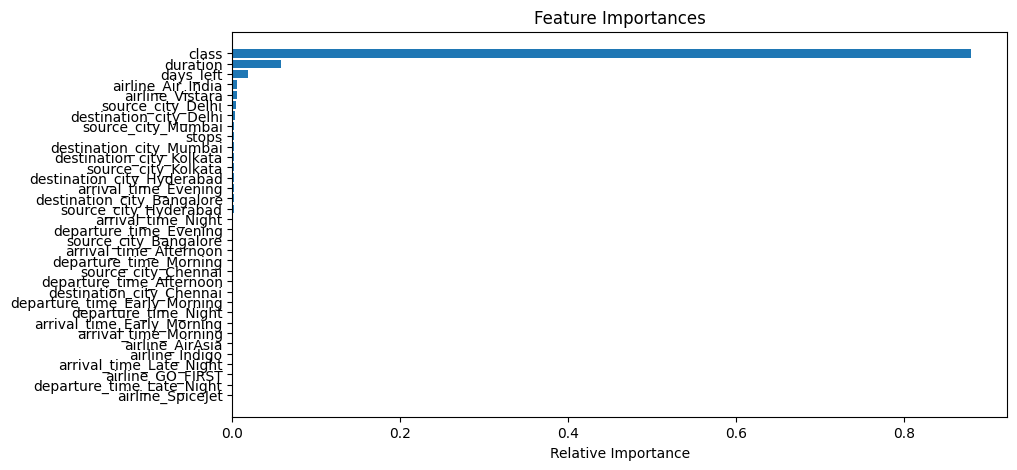

In [14]:
# understand the importance of each feature
importances = model.feature_importances_
features = x.columns
indices = importances.argsort() # sort the indices of importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.title('Feature Importances')            
plt.barh(range(len(indices)), importances[indices], align='center')     
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


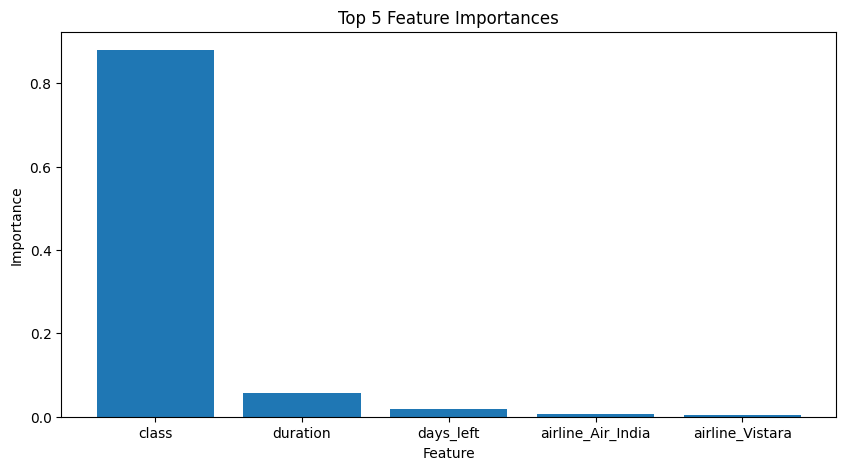

In [15]:
# another way to get the feature importance

importances = dict(zip(model.feature_names_in_, model.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

sorted_importances

plt.figure(figsize=(10, 5))
plt.bar([x[0] for x in sorted_importances[:5]], [x[1] for x in sorted_importances[:5]])
plt.xlabel('Feature')   
plt.ylabel('Importance')    
plt.title('Top 5 Feature Importances')
plt.show()

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

model = RandomForestRegressor()

param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),    
    'min_samples_leaf': randint(1, 4),
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=2, cv=3, n_jobs=-1, verbose=2)
random_search.fit(x_train, y_train)

best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [19]:
best_regressor.score(x_test, y_test)

y_pred = best_regressor.predict(x_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R^2:', r2_score(y_test, y_pred))
print('Root Mean Squared Error:', root_mean_squared_error(y_test, y_pred))

Mean Squared Error: 8370801.575428699
Mean Absolute Error: 1425.6679004294801
R^2: 0.9837612232182601
Root Mean Squared Error: 2893.2337574811854


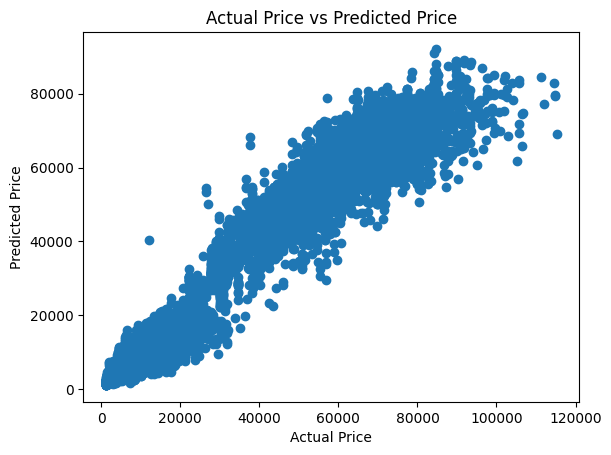

In [20]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')  
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()